In [1]:
pip install ucimlrepo


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


 Distribuicao de cada feature
            HighBP     HighChol    CholCheck          BMI       Smoker  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.591000     0.530000     0.983000    29.217000     0.446000   
std       0.491895     0.499349     0.129336     6.218085     0.497324   
min       0.000000     0.000000     0.000000    16.000000     0.000000   
25%       0.000000     0.000000     1.000000    25.000000     0.000000   
50%       1.000000     1.000000     1.000000    28.000000     0.000000   
75%       1.000000     1.000000     1.000000    32.000000     1.000000   
max       1.000000     1.000000     1.000000    59.000000     1.000000   

            Stroke  HeartDiseaseorAttack  PhysActivity       Fruits  \
count  1000.000000           1000.000000   1000.000000  1000.000000   
mean      0.066000              0.134000      0.636000     0.578000   
std       0.248406              0.340823      0.481389     0.494126   
min       0.000000 

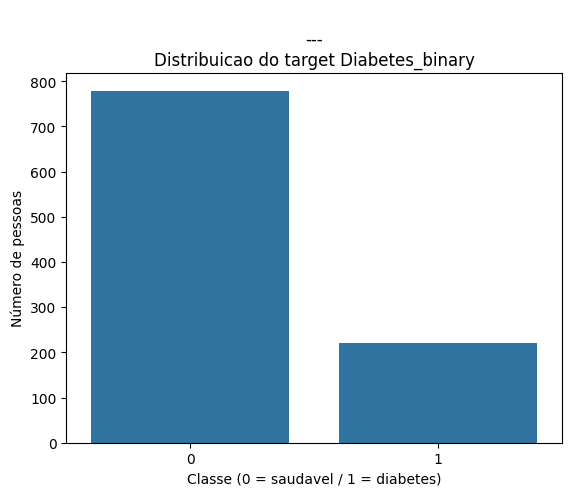


---
Variancia:
CholCheck                0.016728
HvyAlcoholConsump        0.030069
AnyHealthcare            0.040276
Stroke                   0.061706
NoDocbcCost              0.092483
HeartDiseaseorAttack     0.116160
Veggies                  0.188187
DiffWalk                 0.212187
Sex                      0.227123
PhysActivity             0.231736
HighBP                   0.241961
Fruits                   0.244160
Smoker                   0.247331
HighChol                 0.249349
Education                1.108748
GenHlth                  1.208520
Income                   4.978754
Age                      7.111350
BMI                     38.664576
MentHlth                70.434305
PhysHlth                98.587832
dtype: float64

--
 Proporção das classes em no target:
Diabetes_binary
0    0.779
1    0.221
Name: proportion, dtype: float64


In [1]:
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline



# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# metadata
#print(cdc_diabetes_health_indicators.metadata)

# variable information
#print(cdc_diabetes_health_indicators.variables)


y = y["Diabetes_binary"]

X = X.head(1000)
y = y.head(1000)
# print(X.head(10))

def diagnostico_dataset(X, y):
    print(" Distribuicao de cada feature")
    print(X.describe())
    sns.countplot(x=y)
    plt.title("\n---\nDistribuicao do target Diabetes_binary")
    plt.xlabel("Classe (0 = saudavel / 1 = diabetes)")
    plt.ylabel("Número de pessoas")
    plt.show()

    print("\n---\nVariancia:")
    print(X.var().sort_values())

    print("\n--\n Proporção das classes em no target:")
    print(y.value_counts(normalize=True))


diagnostico_dataset(X, y)




# Questão 1 Estruturação conceitual do problema de modelagem



#### B.Justifique tecnicamente por que o problema em questão deve ser tratado como uma tarefa de classificação supervisionada, considerando a presença da variável-alvo (Diabetes_binary) e a natureza das variáveis explicativas disponíveis na base de dados.

Como o problema envolve um dataset em que **já conhecemos** as features( colesterol alto, fumante, consumo de vegetais,etc) a modelagem envolverá descobrir Y, onde Y é a variável-alvo que desejamos saber, ou seja, não se trata de conhecer as features do dataset, então por isso será uma tarefa de classificação **supervisionada**.


#### C.Identifique e discuta ao menos dois desafios relevantes para a aplicação de modelos de aprendizado supervisionado neste conjunto de dados, como por exemplo: necessidade de normalização, variáveis com baixa variância, ou possível desequilíbrio entre classes.


1. Features que não contribuem:

    Atráves do método `X.describe` do pandas é possível identificar que a resposta das pessoas em sua vasta maioria teve média de quase 1 para checagem de Colesterol nos ultimos 5 anos e se possuem plano de saúde, ou seja, a quase todo mundo respondeu Sim para ambos, sendo uma falta de diversidade que não contribui para o modelo aprender a identificar quem terá diabetes

1.  Desequilibrio entre classes na variável-alvo:

    No dataset de  CDC Behavioral Risk Factor Surveillance a variável alvo  que diz se uma pessoa tem ou não diabetes em sua maior parte ( 86%) são de pessoas que não tem diabetes, um modelo treinado por esse dataset iria adivinhar que uma pessoa não terá diabetes em grande parte do tempo, mas não será **eficaz para prever pessoas que terão diabetes, ou seja a minoria**. Para resolver isso poderiámos utilizar Downsampling reduzindo aleatoriamente o número de exemplos da classe majoritária.



# Questão 2 Implementação do modelo com K-Nearest Neighbors

#### A.Carregue a base de dados corretamente, identifique a variável-alvo e selecione as variáveis explicativas que serão utilizadas no modelo, apresentando uma justificativa concisa para suas escolhas.


Variaveis escolhidas serão: BMI que é o IMC, índice de massa corporal, pois pessoas sobrepeso possuem maior risco de diabetes
PhysActivity pois pessoas que não praticam atividades fisicas possuem mais risco de ter diabete
HighBP porque pressão alta gera problemas digestivos/metabólicos que podem acarretar ou agravar diabetes
Age pois quanto maior, mais aumenta a chance de diabetes tipo 2 e varias outras doenças
Smoker porque fumar esta relacionado a muitos problemas de saúde que se perpetuam

#### B.Realize a separação entre os conjuntos de treino e teste utilizando uma estratégia que preserve a proporção entre as classes (stratification). Descreva como essa separação foi feita e por que ela é importante neste caso.


A separação foi realizada através do método `train_test_split`, utilizando 20% dos dados para testar/validar. Assim sendo, o modelo é treinado com 80% dos dados e os outros 20% servirão para validar simulando seus acertos reais. O modelo será altamente eficaz em acertar somente os casos que ele aprendeu (80%), sem a separação poderia-se acusar alta acurácia em dado modelo, sendo que essa acurácia só ocorreria nos dados de treino que foi o que ele aprendeu, e não nos dados reais.


In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#### C.Aplique normalização nas variáveis numéricas, explicando por que essa etapa é necessária para o funcionamento adequado do KNN.


A normalização aplicada no KNN é essencial porque o algoritmo calcula distâncias entre pontos. Se as features tiverem escalas diferentes, as distâncias serão dominadas pelas features com maior valor, o que pode levar a resultados tendenciosos para algum lado. A normalização aplicada é o StandardScaler pelo trecho de código da pipeline `Pipeline([("scaler", StandardScaler()),` ela subtrai a média de cada feature e divide pelo desvio padrão, dessa forma o desvio padrão dos dados normalizados será 1 e neles não haverá  tendência para features que não tem motivo. Exemplo: Age sempre será algo muito maior que Smoker que é algo binário, o modelo poderia levar muito mais em consideração Age  do que Smoker.

#### D.Treine o modelo, realize predições sobre o conjunto de teste e avalie o desempenho inicial do classificador. Em seguida, analise como a variação do parâmetro K afeta o desempenho do modelo, e discuta qual valor foi escolhido para sua versão final e por quê.


Conforme codigo e gráfico abaixo temos como desempenho inicial K=1 uma taxa de acurácia de cerca de 60%; conforme aumentamos K a taxa de acurácia variou e obteve o melhor valor escolhido para versão final  em K=14, então K=14 será o valor escolhido para versão final, pois ele possui o maior nivel de acurácia, isto é, para os casos que são maioria ele teve uma taxa de 75% de acerto.

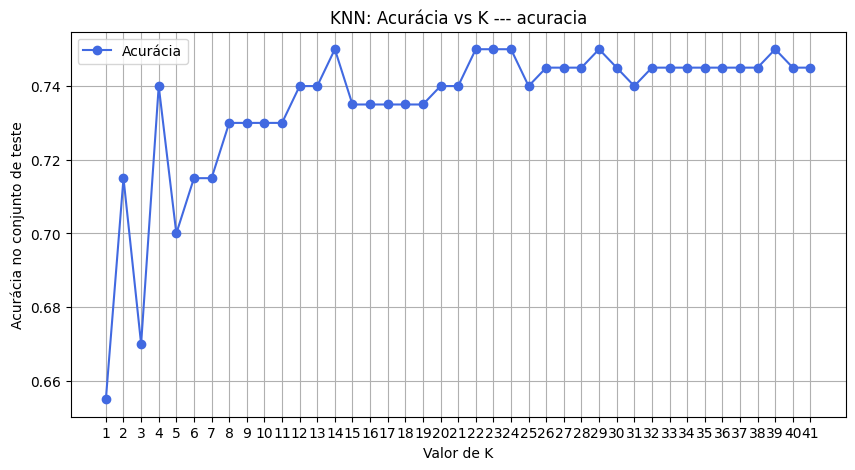

Melhor valor de K: 14 com acuraacia 0.75


In [11]:


def melhor_knn_acuracia(): 
    k_values = range(1, 42)
    accuracies = []

    for k in k_values:
        pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("knn", KNeighborsClassifier(n_neighbors=k))
        ])
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)

    # 5. Plotar acurácia
    plt.figure(figsize=(10, 5))
    plt.plot(k_values, accuracies, marker='o', label="Acurácia", color="royalblue")
    plt.xlabel("Valor de K")
    plt.ylabel("Acurácia no conjunto de teste")
    plt.title("KNN: Acurácia vs K --- acuracia")
    plt.xticks(k_values)
    plt.grid(True)
    plt.legend()
    plt.show()

    # 6. Mostra melhor K
    best_k = k_values[np.argmax(accuracies)]
    maior = max(accuracies)
    print(f"Melhor valor de K: {best_k} com acuraacia {maior}")

melhor_knn_acuracia()

# Questão 3 Validação cruzada e comparação entre modelos
    #### A.Aplique validação cruzada ao modelo KNN, explicando a estratégia adotada (número de dobras, métrica utilizada e justificativa para as escolhas). Comente como a validação cruzada contribui para estimar o desempenho real do modelo.

 A validação cruzada ajuda detectar a performance real que o modelo teria dificultando métricas enviesadas por vezes onde o modelo tenha se lembrado das respostas para prever. Para comparar o modelo sob condições igualitárias, ele coloca sobre N folds/camadas (geralmente 5) considerando o primeira camada uma superfície de dados de teste, as outras para treino, no caso abaixo são 5,( cv=5 ) onde a primeira será para teste do modelo treinado, porém isso irá variar, as camadas trocarão de lugar entre si 5 vezes, por isso se chama validação cruzada.

 As métricas usadas envolvem: a acurácia que é a taxa de acertos positivos do modelo KNN e também, e o recall que é quantos acertos positivos reais o modelo KNN conseguiu prever
, ela calcularia os verdadeiros positivos que são aqueles casos que tem terão diabetes ? elabore sobre esses assuntos com palavras simples




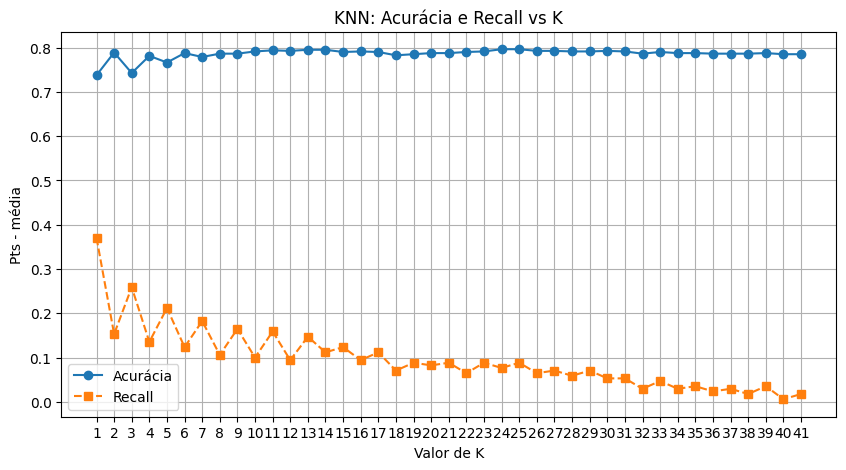

In [12]:
def melhor_knn_valid_cruzada():
    k_values = range(1, 42)
    accuracies = []
    recalls = []

    for k in k_values:
        pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("knn", KNeighborsClassifier(n_neighbors=k))
        ])

        acc = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy').mean()
        recall = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='recall').mean()
        
        accuracies.append(acc)
        recalls.append(recall)

    plt.figure(figsize=(10, 5))
    plt.plot(k_values, accuracies, marker='o', label="Acurácia")
    plt.plot(k_values, recalls, marker='s', label="Recall", linestyle='--')
    plt.xlabel("Valor de K")
    plt.ylabel("Pts - média")
    plt.title("KNN: Acurácia e Recall vs K")
    plt.xticks(k_values)
    plt.legend()
    plt.grid(True)
    plt.show()

melhor_knn_valid_cruzada()


#### B.Implemente ao menos um modelo adicional de classificação (por exemplo, regressão logística ou árvore de decisão) e aplique o mesmo processo de validação cruzada, mantendo os critérios de avaliação consistentes. 

#### C.Compare os modelos com base nos resultados obtidos na validação cruzada. Apresente os resultados em formato tabular ou gráfico e destaque qual modelo apresentou desempenho mais estável ou consistente.



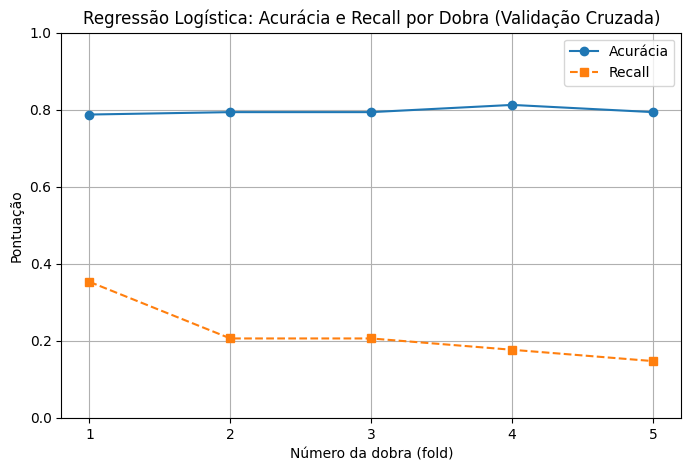

In [14]:

from sklearn.linear_model import LogisticRegression


def avalia_logreg_pontuacoes(X_train, y_train):
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("logreg", LogisticRegression(solver='liblinear'))
    ])

    acc = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    recall = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='recall')

    return acc, recall

def plota_resultado_logreg(acc_scores, recall_scores):
    folds = range(1, len(acc_scores) + 1)

    plt.figure(figsize=(8, 5))
    plt.plot(folds, acc_scores, marker='o', label="Acurácia")
    plt.plot(folds, recall_scores, marker='s', label="Recall", linestyle='--')
    plt.title("Regressão Logística: Acurácia e Recall por Dobra (Validação Cruzada)")
    plt.xlabel("Número da dobra (fold)")
    plt.ylabel("Pontuação")
    plt.ylim(0, 1)
    plt.xticks(folds)
    plt.grid(True)
    plt.legend()
    plt.show()

acc_scores, recall_scores = avalia_logreg_pontuacoes(X_train, y_train)

plota_resultado_logreg(acc_scores, recall_scores)

#### D.Com base nos resultados da validação, discuta brevemente se há indícios de overfitting ou underfitting em algum dos modelos testados, relacionando os achados com os conceitos de viés, variância e complexidade do modelo.
